# Import libraries

In [21]:
!pip install attention

In [22]:
import numpy as np
from numpy import newaxis
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, Activation
from keras import optimizers

from attention import Attention
from keras.models import Sequential
from keras import optimizers

# Load dataset

In [23]:
df = pd.read_csv("./USDT.csv")
df1=df.reset_index()['Price']
df1.head()

0    1.0100
1    0.9959
2    0.9977
3    1.0000
4    1.0000
Name: Price, dtype: float64

In [24]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# Split the data into training (70%), test (20%) and validate (10%) sets

In [25]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1362, 1)
Test shape: (389, 1)
Validate shape: (196, 1)


In [26]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [29]:
model = Sequential([
    SimpleRNN(100, return_sequences=True, input_shape=(time_step, 1)),
    Attention(),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 attention_1 (Attention)     (None, 128)               35600     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,961
Trainable params: 49,961
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train,y_train,validation_data=(X_test, ytest),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
20/20 [==============================] - 3s 55ms/step - loss: 0.0713 - accuracy: 7.9302e-04 - val_loss: 8.7649e-04 - val_accuracy: 0.0000e+00
Epoch 2/300
20/20 [==============================] - 1s 43ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 2.7673e-04 - val_accuracy: 0.0000e+00
Epoch 3/300
20/20 [==============================] - 1s 43ms/step - loss: 0.0017 - accuracy: 7.9302e-04 - val_loss: 2.2151e-04 - val_accuracy: 0.0000e+00
Epoch 4/300
20/20 [==============================] - 1s 40ms/step - loss: 0.0019 - accuracy: 7.9302e-04 - val_loss: 1.5548e-04 - val_accuracy: 0.0000e+00
Epoch 5/300
20/20 [==============================] - 1s 40ms/step - loss: 0.0014 - accuracy: 7.9302e-04 - val_loss: 1.6561e-04 - val_accuracy: 0.0000e+00
Epoch 6/300
20/20 [==============================] - 1s 39ms/step - loss: 0.0014 - accuracy: 7.9302e-04 - val_loss: 7.8855e-04 - val_accuracy: 0.0000e+00
Epoch 7/300
20/20 [==============================] - 1s 42ms/step - loss: 0.

20/20 [==============================] - 1s 39ms/step - loss: 8.4930e-04 - accuracy: 7.9302e-04 - val_loss: 1.8477e-05 - val_accuracy: 0.0000e+00
Epoch 54/300
20/20 [==============================] - 1s 47ms/step - loss: 8.7353e-04 - accuracy: 7.9302e-04 - val_loss: 2.2210e-05 - val_accuracy: 0.0000e+00
Epoch 55/300
20/20 [==============================] - 1s 38ms/step - loss: 8.8665e-04 - accuracy: 7.9302e-04 - val_loss: 8.4400e-05 - val_accuracy: 0.0000e+00
Epoch 56/300
20/20 [==============================] - 1s 45ms/step - loss: 8.0944e-04 - accuracy: 7.9302e-04 - val_loss: 1.0517e-04 - val_accuracy: 0.0000e+00
Epoch 57/300
20/20 [==============================] - 1s 45ms/step - loss: 8.8375e-04 - accuracy: 7.9302e-04 - val_loss: 2.7896e-04 - val_accuracy: 0.0000e+00
Epoch 58/300
20/20 [==============================] - 1s 40ms/step - loss: 8.3782e-04 - accuracy: 7.9302e-04 - val_loss: 2.3477e-04 - val_accuracy: 0.0000e+00
Epoch 59/300
20/20 [==============================] - 1s 40

Epoch 105/300
20/20 [==============================] - 1s 40ms/step - loss: 8.9801e-04 - accuracy: 7.9302e-04 - val_loss: 6.5897e-05 - val_accuracy: 0.0000e+00
Epoch 106/300
20/20 [==============================] - 1s 41ms/step - loss: 6.2787e-04 - accuracy: 7.9302e-04 - val_loss: 1.3202e-05 - val_accuracy: 0.0000e+00
Epoch 107/300
20/20 [==============================] - 1s 42ms/step - loss: 5.8070e-04 - accuracy: 7.9302e-04 - val_loss: 4.6551e-04 - val_accuracy: 0.0000e+00
Epoch 108/300
20/20 [==============================] - 1s 39ms/step - loss: 6.9771e-04 - accuracy: 7.9302e-04 - val_loss: 1.4737e-04 - val_accuracy: 0.0000e+00
Epoch 109/300
20/20 [==============================] - 1s 39ms/step - loss: 5.8781e-04 - accuracy: 7.9302e-04 - val_loss: 4.4101e-05 - val_accuracy: 0.0000e+00
Epoch 110/300
20/20 [==============================] - 1s 40ms/step - loss: 6.2190e-04 - accuracy: 7.9302e-04 - val_loss: 7.8444e-05 - val_accuracy: 0.0000e+00
Epoch 111/300
20/20 [===================

20/20 [==============================] - 1s 42ms/step - loss: 4.8418e-04 - accuracy: 7.9302e-04 - val_loss: 4.4486e-05 - val_accuracy: 0.0000e+00
Epoch 157/300
20/20 [==============================] - 1s 45ms/step - loss: 6.3016e-04 - accuracy: 7.9302e-04 - val_loss: 1.5538e-04 - val_accuracy: 0.0000e+00
Epoch 158/300
20/20 [==============================] - 1s 43ms/step - loss: 5.4818e-04 - accuracy: 7.9302e-04 - val_loss: 1.4138e-05 - val_accuracy: 0.0000e+00
Epoch 159/300
20/20 [==============================] - 1s 43ms/step - loss: 5.7409e-04 - accuracy: 7.9302e-04 - val_loss: 1.8767e-05 - val_accuracy: 0.0000e+00
Epoch 160/300
20/20 [==============================] - 1s 43ms/step - loss: 6.0764e-04 - accuracy: 7.9302e-04 - val_loss: 1.5541e-05 - val_accuracy: 0.0000e+00
Epoch 161/300
20/20 [==============================] - 1s 46ms/step - loss: 6.0423e-04 - accuracy: 7.9302e-04 - val_loss: 2.4304e-04 - val_accuracy: 0.0000e+00
Epoch 162/300
20/20 [==============================] -

20/20 [==============================] - 1s 40ms/step - loss: 5.1772e-04 - accuracy: 7.9302e-04 - val_loss: 3.6662e-04 - val_accuracy: 0.0000e+00
Epoch 208/300
20/20 [==============================] - 1s 39ms/step - loss: 4.6385e-04 - accuracy: 7.9302e-04 - val_loss: 3.1616e-04 - val_accuracy: 0.0000e+00
Epoch 209/300
20/20 [==============================] - 1s 39ms/step - loss: 5.1950e-04 - accuracy: 7.9302e-04 - val_loss: 2.2775e-04 - val_accuracy: 0.0000e+00
Epoch 210/300
20/20 [==============================] - 1s 40ms/step - loss: 5.1806e-04 - accuracy: 7.9302e-04 - val_loss: 6.6252e-05 - val_accuracy: 0.0000e+00
Epoch 211/300
20/20 [==============================] - 1s 39ms/step - loss: 4.8653e-04 - accuracy: 7.9302e-04 - val_loss: 1.9687e-05 - val_accuracy: 0.0000e+00
Epoch 212/300
20/20 [==============================] - 1s 39ms/step - loss: 4.7386e-04 - accuracy: 7.9302e-04 - val_loss: 3.6829e-05 - val_accuracy: 0.0000e+00
Epoch 213/300
20/20 [==============================] -

20/20 [==============================] - 1s 47ms/step - loss: 3.7807e-04 - accuracy: 7.9302e-04 - val_loss: 3.8117e-05 - val_accuracy: 0.0000e+00
Epoch 259/300
20/20 [==============================] - 1s 43ms/step - loss: 3.6875e-04 - accuracy: 7.9302e-04 - val_loss: 2.2858e-04 - val_accuracy: 0.0000e+00
Epoch 260/300
20/20 [==============================] - 1s 46ms/step - loss: 4.6396e-04 - accuracy: 7.9302e-04 - val_loss: 1.4970e-04 - val_accuracy: 0.0000e+00
Epoch 261/300
20/20 [==============================] - 1s 45ms/step - loss: 4.7011e-04 - accuracy: 7.9302e-04 - val_loss: 1.4665e-05 - val_accuracy: 0.0000e+00
Epoch 262/300
20/20 [==============================] - 1s 46ms/step - loss: 3.7241e-04 - accuracy: 7.9302e-04 - val_loss: 1.4035e-05 - val_accuracy: 0.0000e+00
Epoch 263/300
20/20 [==============================] - 1s 41ms/step - loss: 3.8023e-04 - accuracy: 7.9302e-04 - val_loss: 1.0600e-04 - val_accuracy: 0.0000e+00
Epoch 264/300
20/20 [==============================] -

In [31]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

3/3 [==============================] - 0s 13ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [33]:
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 0.3725343787148469
Testing RMSE: 0.37750890678662363


In [34]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=135
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input= x_input.reshape(1,-1)
        print("x_input:",x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.60831234 0.60831234 0.60453401 0.6070529  0.6070529  0.60957179
 0.61209068 0.61335013 0.61335013 0.61460957 0.61586902 0.61838791
 0.62594458 0.62342569 0.62216625 0.62342569 0.62468514 0.6209068
 0.62216625 0.62342569 0.62468514 0.62342569 0.62342569 0.62720403
 0.62468514 0.61964736 0.62342569 0.62468514 0.62468514 0.62594458
 0.62468514 0.62216625 0.62468514 0.62342569 0.62216625 0.62468514
 0.62594458 0.62720403 0.62216625 0.61964736 0.61964736 0.61838791
 0.61838791 0.6209068  0.61964736 0.6209068  0.61964736 0.61838791
 0.61838791 0.61964736 0.6209068  0.62468514 0.62216625 0.62342569
 0.6209068  0.62342569 0.62342569 0.62468514 0.62468514 0.62342569
 0.62468514 0.6209068  0.62216625 0.62342569 0.62342569 0.62468514
 0.62342569 0.62468514 0.62468514 0.62216625 0.62468514 0.62468514
 0.62216625 0.62342569 0.62342569 0.62342569 0.62342569 0.62342569
 0.62216625 0.62468514 0.62216625 0.62342569 0.62216625 0.62216625
 0.62342569 0.62342569 0.62468514 0.62846348 0.6259

4 day output [[0.6370192]]
5 day input [0.60957179 0.61209068 0.61335013 0.61335013 0.61460957 0.61586902
 0.61838791 0.62594458 0.62342569 0.62216625 0.62342569 0.62468514
 0.6209068  0.62216625 0.62342569 0.62468514 0.62342569 0.62342569
 0.62720403 0.62468514 0.61964736 0.62342569 0.62468514 0.62468514
 0.62594458 0.62468514 0.62216625 0.62468514 0.62342569 0.62216625
 0.62468514 0.62594458 0.62720403 0.62216625 0.61964736 0.61964736
 0.61838791 0.61838791 0.6209068  0.61964736 0.6209068  0.61964736
 0.61838791 0.61838791 0.61964736 0.6209068  0.62468514 0.62216625
 0.62342569 0.6209068  0.62342569 0.62342569 0.62468514 0.62468514
 0.62342569 0.62468514 0.6209068  0.62216625 0.62342569 0.62342569
 0.62468514 0.62342569 0.62468514 0.62468514 0.62216625 0.62468514
 0.62468514 0.62216625 0.62342569 0.62342569 0.62342569 0.62342569
 0.62342569 0.62216625 0.62468514 0.62216625 0.62342569 0.62216625
 0.62216625 0.62342569 0.62342569 0.62468514 0.62846348 0.62594458
 0.62342569 0.62342569 

8 day output [[0.64887834]]
9 day input [0.61460957 0.61586902 0.61838791 0.62594458 0.62342569 0.62216625
 0.62342569 0.62468514 0.6209068  0.62216625 0.62342569 0.62468514
 0.62342569 0.62342569 0.62720403 0.62468514 0.61964736 0.62342569
 0.62468514 0.62468514 0.62594458 0.62468514 0.62216625 0.62468514
 0.62342569 0.62216625 0.62468514 0.62594458 0.62720403 0.62216625
 0.61964736 0.61964736 0.61838791 0.61838791 0.6209068  0.61964736
 0.6209068  0.61964736 0.61838791 0.61838791 0.61964736 0.6209068
 0.62468514 0.62216625 0.62342569 0.6209068  0.62342569 0.62342569
 0.62468514 0.62468514 0.62342569 0.62468514 0.6209068  0.62216625
 0.62342569 0.62342569 0.62468514 0.62342569 0.62468514 0.62468514
 0.62216625 0.62468514 0.62468514 0.62216625 0.62342569 0.62342569
 0.62342569 0.62342569 0.62342569 0.62216625 0.62468514 0.62216625
 0.62342569 0.62216625 0.62216625 0.62342569 0.62342569 0.62468514
 0.62846348 0.62594458 0.62342569 0.62342569 0.62468514 0.62342569
 0.62594458 0.62216625 

12 day output [[0.6485109]]
13 day input [0.62342569 0.62216625 0.62342569 0.62468514 0.6209068  0.62216625
 0.62342569 0.62468514 0.62342569 0.62342569 0.62720403 0.62468514
 0.61964736 0.62342569 0.62468514 0.62468514 0.62594458 0.62468514
 0.62216625 0.62468514 0.62342569 0.62216625 0.62468514 0.62594458
 0.62720403 0.62216625 0.61964736 0.61964736 0.61838791 0.61838791
 0.6209068  0.61964736 0.6209068  0.61964736 0.61838791 0.61838791
 0.61964736 0.6209068  0.62468514 0.62216625 0.62342569 0.6209068
 0.62342569 0.62342569 0.62468514 0.62468514 0.62342569 0.62468514
 0.6209068  0.62216625 0.62342569 0.62342569 0.62468514 0.62342569
 0.62468514 0.62468514 0.62216625 0.62468514 0.62468514 0.62216625
 0.62342569 0.62342569 0.62342569 0.62342569 0.62342569 0.62216625
 0.62468514 0.62216625 0.62342569 0.62216625 0.62216625 0.62342569
 0.62342569 0.62468514 0.62846348 0.62594458 0.62342569 0.62342569
 0.62468514 0.62342569 0.62594458 0.62216625 0.62468514 0.62216625
 0.62342569 0.62342569

16 day output [[0.65086854]]
17 day input [0.6209068  0.62216625 0.62342569 0.62468514 0.62342569 0.62342569
 0.62720403 0.62468514 0.61964736 0.62342569 0.62468514 0.62468514
 0.62594458 0.62468514 0.62216625 0.62468514 0.62342569 0.62216625
 0.62468514 0.62594458 0.62720403 0.62216625 0.61964736 0.61964736
 0.61838791 0.61838791 0.6209068  0.61964736 0.6209068  0.61964736
 0.61838791 0.61838791 0.61964736 0.6209068  0.62468514 0.62216625
 0.62342569 0.6209068  0.62342569 0.62342569 0.62468514 0.62468514
 0.62342569 0.62468514 0.6209068  0.62216625 0.62342569 0.62342569
 0.62468514 0.62342569 0.62468514 0.62468514 0.62216625 0.62468514
 0.62468514 0.62216625 0.62342569 0.62342569 0.62342569 0.62342569
 0.62342569 0.62216625 0.62468514 0.62216625 0.62342569 0.62216625
 0.62216625 0.62342569 0.62342569 0.62468514 0.62846348 0.62594458
 0.62342569 0.62342569 0.62468514 0.62342569 0.62594458 0.62216625
 0.62468514 0.62216625 0.62342569 0.62342569 0.62468514 0.62342569
 0.62216625 0.623425

20 day output [[0.6468017]]
21 day input [0.62342569 0.62342569 0.62720403 0.62468514 0.61964736 0.62342569
 0.62468514 0.62468514 0.62594458 0.62468514 0.62216625 0.62468514
 0.62342569 0.62216625 0.62468514 0.62594458 0.62720403 0.62216625
 0.61964736 0.61964736 0.61838791 0.61838791 0.6209068  0.61964736
 0.6209068  0.61964736 0.61838791 0.61838791 0.61964736 0.6209068
 0.62468514 0.62216625 0.62342569 0.6209068  0.62342569 0.62342569
 0.62468514 0.62468514 0.62342569 0.62468514 0.6209068  0.62216625
 0.62342569 0.62342569 0.62468514 0.62342569 0.62468514 0.62468514
 0.62216625 0.62468514 0.62468514 0.62216625 0.62342569 0.62342569
 0.62342569 0.62342569 0.62342569 0.62216625 0.62468514 0.62216625
 0.62342569 0.62216625 0.62216625 0.62342569 0.62342569 0.62468514
 0.62846348 0.62594458 0.62342569 0.62342569 0.62468514 0.62342569
 0.62594458 0.62216625 0.62468514 0.62216625 0.62342569 0.62342569
 0.62468514 0.62342569 0.62216625 0.62342569 0.62342569 0.62216625
 0.62342569 0.62216625

24 day output [[0.64457417]]
25 day input [0.61964736 0.62342569 0.62468514 0.62468514 0.62594458 0.62468514
 0.62216625 0.62468514 0.62342569 0.62216625 0.62468514 0.62594458
 0.62720403 0.62216625 0.61964736 0.61964736 0.61838791 0.61838791
 0.6209068  0.61964736 0.6209068  0.61964736 0.61838791 0.61838791
 0.61964736 0.6209068  0.62468514 0.62216625 0.62342569 0.6209068
 0.62342569 0.62342569 0.62468514 0.62468514 0.62342569 0.62468514
 0.6209068  0.62216625 0.62342569 0.62342569 0.62468514 0.62342569
 0.62468514 0.62468514 0.62216625 0.62468514 0.62468514 0.62216625
 0.62342569 0.62342569 0.62342569 0.62342569 0.62342569 0.62216625
 0.62468514 0.62216625 0.62342569 0.62216625 0.62216625 0.62342569
 0.62342569 0.62468514 0.62846348 0.62594458 0.62342569 0.62342569
 0.62468514 0.62342569 0.62594458 0.62216625 0.62468514 0.62216625
 0.62342569 0.62342569 0.62468514 0.62342569 0.62216625 0.62342569
 0.62342569 0.62216625 0.62342569 0.62216625 0.62216625 0.6209068
 0.6209068  0.6209068 

28 day output [[0.6486087]]
29 day input [0.62594458 0.62468514 0.62216625 0.62468514 0.62342569 0.62216625
 0.62468514 0.62594458 0.62720403 0.62216625 0.61964736 0.61964736
 0.61838791 0.61838791 0.6209068  0.61964736 0.6209068  0.61964736
 0.61838791 0.61838791 0.61964736 0.6209068  0.62468514 0.62216625
 0.62342569 0.6209068  0.62342569 0.62342569 0.62468514 0.62468514
 0.62342569 0.62468514 0.6209068  0.62216625 0.62342569 0.62342569
 0.62468514 0.62342569 0.62468514 0.62468514 0.62216625 0.62468514
 0.62468514 0.62216625 0.62342569 0.62342569 0.62342569 0.62342569
 0.62342569 0.62216625 0.62468514 0.62216625 0.62342569 0.62216625
 0.62216625 0.62342569 0.62342569 0.62468514 0.62846348 0.62594458
 0.62342569 0.62342569 0.62468514 0.62342569 0.62594458 0.62216625
 0.62468514 0.62216625 0.62342569 0.62342569 0.62468514 0.62342569
 0.62216625 0.62342569 0.62342569 0.62216625 0.62342569 0.62216625
 0.62216625 0.6209068  0.6209068  0.6209068  0.62342569 0.66372796
 0.70780856 0.7103274

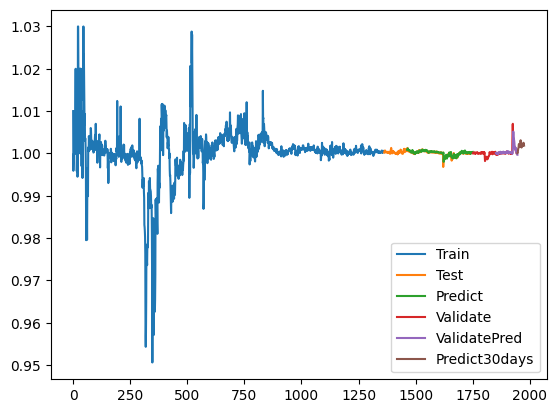

In [35]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()